In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import imutils
import easyocr
from pathlib import Path
import pandas as pd
import os

In [5]:
folder = Path(r"C:\Users\Acer\Documents\เอกสาร\GitHub\Sci-project-m5\Unprocessed-data\Saperate-part-img\No-depressed-head")
original_excel = pd.read_excel(r"C:\Users\Acer\Documents\เอกสาร\GitHub\Sci-project-m5\data\cdi-data-scan1266.xlsx", sheet_name="depressed-data")
df = pd.DataFrame(original_excel)

for jpg_file_path in os.listdir(folder):
    fullname = jpg_file_path.split(".")
    name = fullname[0].split("-")
    id = int(name[1])
    i = df["DEP"][df["ID"]==id].index
    # score = df.loc[0, "Pt"]
    dep = df.loc[i[0], "DEP"]
    if dep==1:
        print(id)

432


In [17]:
df["DEP"][df["ID"]==2]

1    1
Name: DEP, dtype: int64

In [17]:
path = r"C:\Users\Acer\Documents\เอกสาร\GitHub\Sci-project-m5\data\2-5\2-5-drawing_page-0012.jpg"

In [14]:
img = cv2.imread(path, cv2.IMREAD_COLOR)
img = cv2.resize(img , (224, 224))
print(img)

[[[  2   2   2]
  [125 125 125]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  1   1   1]
  [111 111 111]
  [  3   3   3]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [110 110 110]
  [  0   0   0]
  ...
  [ 29  29  29]
  [ 33  33  33]
  [ 33  33  33]]

 ...

 [[  2   2   2]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 19  19  19]
  [  0   0   0]
  [  0   0   0]]

 [[120 120 120]
  [115 115 115]
  [109 109 109]
  ...
  [ 40  40  40]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 43  43  43]
  [  0   0   0]
  [  0   0   0]]]


In [14]:
def cropped(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 15, 20, 20)
    edged = cv2.Canny(bfilter, 30, 200)

    keypoint = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoint)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    mask = np.zeros(gray.shape, np.uint8)
    location = None

    for contour in contours:
        # print(i)
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            max_x = max(approx[:,:,1])
            min_x = min(approx[:,:,1])
            max_y = max(approx[:,:,0])
            min_y = min(approx[:,:,0])

            x_lenght = max_x-min_x
            y_lenght = max_y-min_y

            if x_lenght > 500 and y_lenght > 500:
                location = approx
                break

    if location is not None:
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        (x, y) = np.where(mask==255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))
        cropped_image = gray[x1:x2+1, y1:y2+1]
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        return cropped_image
    else:
        plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
        return gray

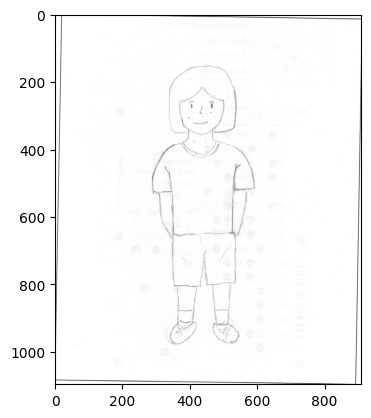

In [18]:
img = cv2.imread(path)
# cropped_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cropped_img = cropped(img)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

In [ ]:
cropped_img.shape

(1742, 1227)

True

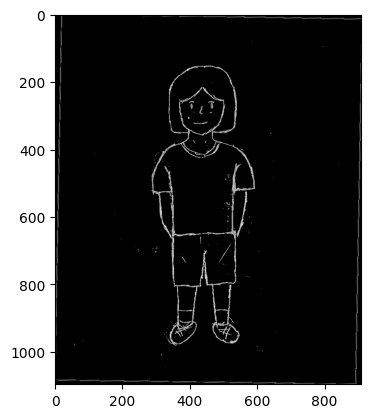

In [19]:
lower = 0  # Lower bound for the color you want to remove
upper = 235 # Upper bound for the color you want to remove

# Create a mask for the color range
mask = cv2.inRange(cropped_img, lower, upper)

# Bitwise-and the mask with the original image
result = cv2.bitwise_and(cropped_img, cropped_img, mask=mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# cv2.imwrite('test-inrange-denoising.jpg', result)
cv2.imwrite(r'C:\Users\Acer\Documents\เอกสาร\GitHub\Sci-project-m5\data_label\No-Depressed\249.jpg', result)

True

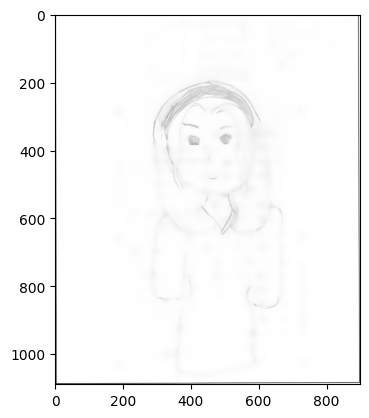

In [ ]:
h = 30

dst = cv2.fastNlMeansDenoising(cropped_img,h,21,7)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
cv2.imwrite(f"test-denoising-{h}.jpg", dst)
cv2.imwrite("test.jpg", cropped_img)

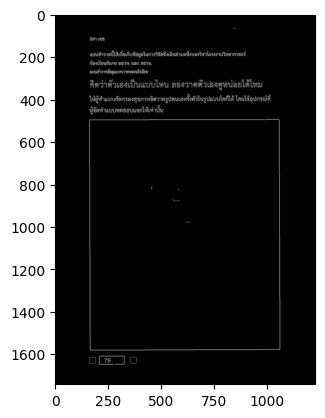

In [ ]:


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

bfilter = cv2.bilateralFilter(gray, 15, 50, 50)
edged = cv2.Canny(bfilter, 100, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

keypoint = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoint)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:20]

In [ ]:
location = None
i = 0
max_int = -1500

for contour in contours:
    i+=1
    print(i)
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        # print(max(i[0]))
        # print("===========")
        max_x = max(approx[:,:,1])
        min_x = min(approx[:,:,1])
        max_y = max(approx[:,:,0])
        min_y = min(approx[:,:,0])
        wid = max_x - min_x
        hig = max_y - min_y

        print(approx)
        print(wid, " ", hig)
        print("++++++++++++++++++++++++++++++++")

        if wid > 25 and hig > 25:
            max_int = max_x
            location = approx
            print("-")


1
[[[ 355 1615]]

 [[ 353 1642]]

 [[ 381 1644]]

 [[ 382 1615]]]
[29]   [29]
++++++++++++++++++++++++++++++++
-
2
[[[ 355 1615]]

 [[ 383 1617]]

 [[ 381 1644]]

 [[ 353 1642]]]
[29]   [30]
++++++++++++++++++++++++++++++++
-
3
[[[ 162 1616]]

 [[ 162 1644]]

 [[ 191 1643]]

 [[ 190 1616]]]
[28]   [29]
++++++++++++++++++++++++++++++++
-
4
[[[ 162 1617]]

 [[ 189 1616]]

 [[ 191 1643]]

 [[ 163 1644]]]
[28]   [29]
++++++++++++++++++++++++++++++++
-
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [ ]:
location = None
i = 0
mask = np.zeros(gray.shape, np.uint8)

for contour in contours:
    i+=1
    print(i)
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        location = approx
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        (x, y) = np.where(mask==255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))
        cropped_image = gray[x1:x2+1, y1:y2+1]

        reader = easyocr.Reader(['en'])
        result = reader.readtext(cropped_image)

        if (result!=[]):
            break


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


1


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


2


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


3


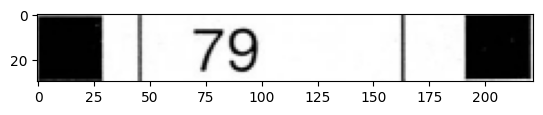

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


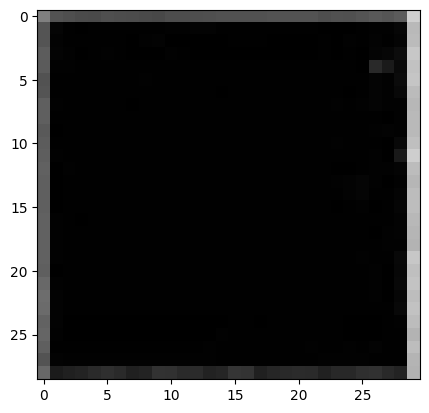

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
result[0][1]

'5'

In [ ]:
def labelClass(ID):
    i = score_table['Pt'][score_table['ID']==ID].index
    score = score_table.loc[i[0], 'Pt']
    
    if score >= 15:
        check = 1
    else:
        check = 0

    if images_cluster

In [ ]:
# original_img = cv2.imread(path)
# Id = result[0][1].rjust(3, '0')
# cv2.imwrite(f'data_label\\{Id}.jpg', original_img)